In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
"""Train a random forest model and return feature importance analysis."""

def train_random_forest(df, target_variable='price', n_estimators=100):
    
    # clean columns with only nil values
    #df = df.drop(['calendar_updated', 'license', 'neighbourhood_group_cleansed'], axis=1)
    
    df = df.dropna(axis=0) # drop rows with nan values

    # Select only numeric columns because random forest can only handle numeric data
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    print("\nUsing these numeric columns for analysis:")
    print(numeric_columns.tolist())

    df_numeric = df[numeric_columns].copy()
    
    X = df_numeric.drop(target_variable, axis=1)
    y = df_numeric[target_variable]  
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # train random forest
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    
    # get the feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return rf, feature_importance, X_test, y_test


In [85]:
"Plot the most important features"
def plot_feature_importance(feature_importance, top_n=20):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(top_n), x='importance', y='feature')
    plt.title(f'Top {top_n} Most Important Features')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    
    return plt



In [87]:
"Merge the listings and amenities datasets by the id (only use price of listings for now)"
def merge_datasets(df_listings, df_amenities, id_column='id'):

    # Clean price column
    df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Select only id and price from listings
    df_listings = df_listings[[id_column, 'price']]

    # Merge datasets on ID
    merged_df = pd.merge(df_listings, df_amenities, on=id_column, how='inner')
    
    print(f"Listings shape: {df_listings.shape}")
    print(f"Amenities shape: {df_amenities.shape}")
    print(f"Merged shape: {merged_df.shape}")
    
    return merged_df

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/var/folders/d6/8kbgggpd27vgm70ms_df0rh00000gn/T/ipykernel_43490/128379273.py:4: SyntaxWarning: invalid escape sequence '\$'
  df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)


Listings shape: (10099, 2)
Amenities shape: (10099, 2365)
Merged shape: (10099, 2366)

Using these numeric columns for analysis:
['id', 'price', 'Fast wifi \\u2013 151 Mbps', 'Movie theater', 'Radio i vinduskarm  Bluetooth sound system', 'Wednesday', '42 inch TV with Chromecast', '43 inch HDTV with standard cable', 'Neutral for sensitive skin body soap', 'Fast wifi \\u2013 563 Mbps', 'Fast wifi \\u2013 580 Mbps', 'Disney+', 'Uparfymert body soap', 'Game console: PS3 and PS4', 'Fast wifi \\u2013 199 Mbps', 'Electrolux stainless steel stove', 'Other stove', 'Fast wifi \\u2013 217 Mbps', 'Smeg refrigerator', 'Radionette airplay sound system', 'Coffee maker: french press', 'Game console: Nintendo Switch and PS4', 'ethanol', 'Generic conditioner', 'Whirpool refrigerator', 'HEOS  sound system', '? stainless steel single oven', 'Electrolux  stainless steel single oven', 'First aid kit', 'SunSilk conditioner', '50 inch TV with Netflix', 'Sonos (multi room) sound system', 'Fast wifi \\u2013 251

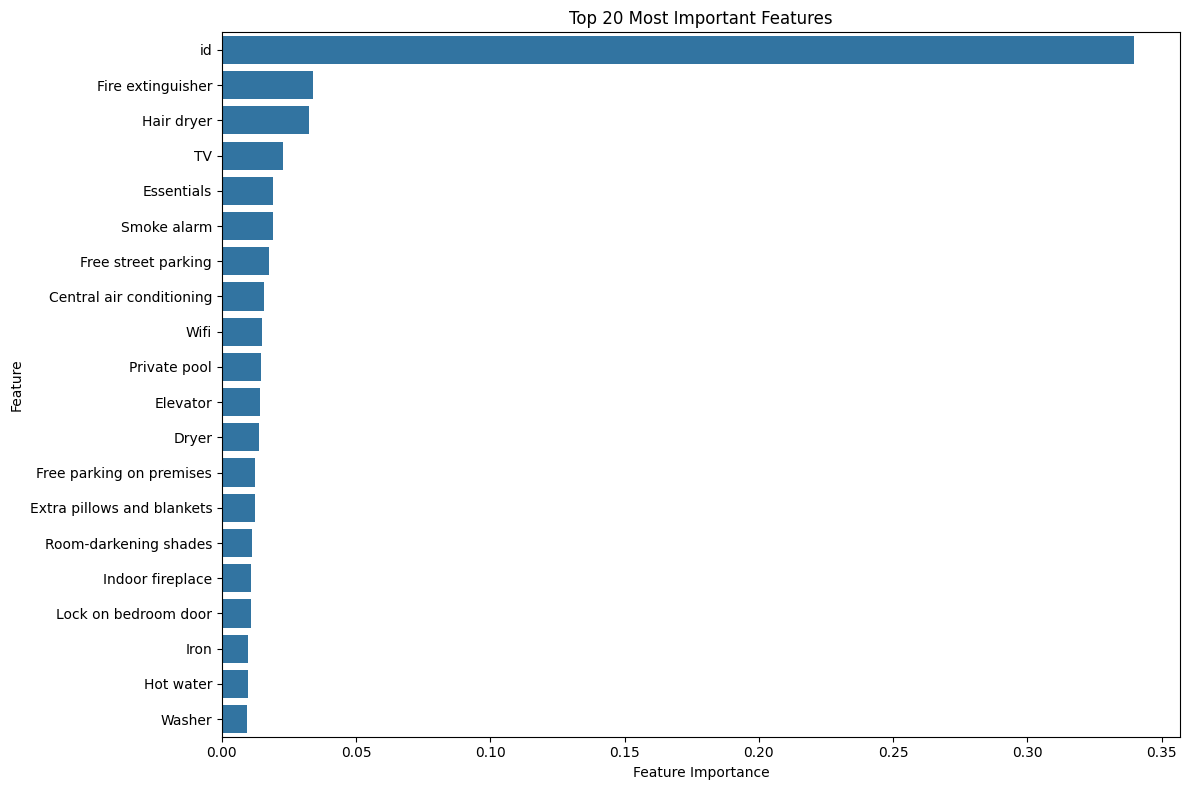

In [84]:

# Read the data
df_listings = pd.read_csv("listings.csv")
df_amenities = pd.read_csv("amenities.csv")

df_merged = merge_datasets(df_listings, df_amenities)

target_variable = 'price'
n_estimators = 100
top_n = 20

rf_model, importance_df, X_test, y_test = train_random_forest(df_merged, target_variable, n_estimators)

# create a plot
plot = plot_feature_importance(importance_df, top_n)

# Print model performance metrics
r2_score = rf_model.score(X_test, y_test)
print(f"\nModel R² Score: {r2_score:.4f}")

# print top features and their importance scores
print(f"\nTop {top_n} Most Important Features:")
print(importance_df.head(top_n).to_string(index=False))
    